## Pandas数据统计函数

1. 汇总类统计
2. 唯一去重和按值计数
3. 相关系数和协方差

In [1]:
import pandas as pd

### 0、读取csv数据

In [2]:
fpath = "./datas/beijing_tianqi/beijing_tianqi_2018.csv"
df = pd.read_csv(fpath)

In [3]:
df.head(3)

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1


In [4]:
# 替换掉温度的后缀℃
df.loc[:, "bWendu"] = df["bWendu"].str.replace("℃", "").astype('int32')
df.loc[:, "yWendu"] = df["yWendu"].str.replace("℃", "").astype('int32')

In [5]:
df.head(3)

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1


### 1、汇总类统计

In [6]:
# 一下子提取所有数字列统计结果
df.describe()

,bWendu,yWendu,aqi,aqiLevel
count,365.000000,365.000000,365.000000,365.000000
mean,18.665753,8.358904,82.183562,2.090411
std,11.858046,11.755053,51.936159,1.029798
min,-5.000000,-12.000000,21.000000,1.000000
25%,8.000000,-3.000000,46.000000,1.000000
50%,21.000000,8.000000,69.000000,2.000000
75%,29.000000,19.000000,104.000000,3.000000
max,38.000000,27.000000,387.000000,6.000000


In [7]:
## 查看单个Series的数据
df["bWendu"].mean()

18.665753424657535

In [7]:
# 最高温
df["bWendu"].max()

38

In [8]:
# 最低温
df["bWendu"].min()

-5

### 2、唯一去重和按值计数

#### 2.1 唯一性去重
一般不用于数值列，而是枚举、分类列

In [9]:
df["fengxiang"].unique()

array(['东北风', '北风', '西北风', '西南风', '南风', '东南风', '东风', '西风'], dtype=object)

In [10]:
df["tianqi"].unique()

array(['晴~多云', '阴~多云', '多云', '阴', '多云~晴', '多云~阴', '晴', '阴~小雪', '小雪~多云',
       '小雨~阴', '小雨~雨夹雪', '多云~小雨', '小雨~多云', '大雨~小雨', '小雨', '阴~小雨',
       '多云~雷阵雨', '雷阵雨~多云', '阴~雷阵雨', '雷阵雨', '雷阵雨~大雨', '中雨~雷阵雨', '小雨~大雨',
       '暴雨~雷阵雨', '雷阵雨~中雨', '小雨~雷阵雨', '雷阵雨~阴', '中雨~小雨', '小雨~中雨', '雾~多云',
       '霾'], dtype=object)

In [11]:
df["fengli"].unique()

array(['1-2级', '4-5级', '3-4级', '2级', '1级', '3级'], dtype=object)

#### 2.2 按值计数

In [12]:
df["fengxiang"].nunique()

8

In [13]:
df["fengxiang"].value_counts()

南风     92
西南风    64
北风     54
西北风    51
东南风    46
东北风    38
东风     14
西风      6
Name: fengxiang, dtype: int64

In [14]:
df["tianqi"].value_counts()

晴         101
多云         95
多云~晴       40
晴~多云       34
多云~雷阵雨     14
多云~阴       10
阴~多云        8
雷阵雨         8
小雨~多云       8
雷阵雨~多云      7
小雨          6
多云~小雨       5
雷阵雨~中雨      4
阴           4
中雨~小雨       2
霾           2
中雨~雷阵雨      2
阴~小雨        2
雷阵雨~大雨      1
小雨~雷阵雨      1
小雪~多云       1
阴~雷阵雨       1
阴~小雪        1
暴雨~雷阵雨      1
雷阵雨~阴       1
小雨~中雨       1
大雨~小雨       1
小雨~大雨       1
雾~多云        1
小雨~阴        1
小雨~雨夹雪      1
Name: tianqi, dtype: int64

In [15]:
df["fengli"].value_counts()

1-2级    236
3-4级     68
1级       21
4-5级     20
2级       13
3级        7
Name: fengli, dtype: int64

### 3、相关系数和协方差

用途（超级厉害）：
1. 两只股票，是不是同涨同跌？程度多大？正相关还是负相关？
2. 产品销量的波动，跟哪些因素正相关、负相关，程度有多大？

对于两个变量X、Y：
1. 协方差：***衡量同向反向程度***，如果协方差为正，说明X，Y同向变化，协方差越大说明同向程度越高；如果协方差为负，说明X，Y反向运动，协方差越小说明反向程度越高。
2. 相关系数：***衡量相似度程度***，当他们的相关系数为1时，说明两个变量变化时的正向相似度最大，当相关系数为－1时，说明两个变量变化的反向相似度最大

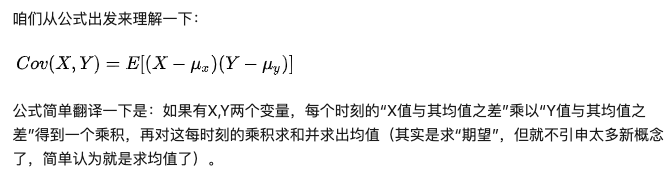

In [16]:
# 协方差矩阵：
df.cov()

,bWendu,yWendu,aqi,aqiLevel
bWendu,140.613247,135.529633,47.462622,0.879204
yWendu,135.529633,138.181274,16.186685,0.264165
aqi,47.462622,16.186685,2697.364564,50.749842
aqiLevel,0.879204,0.264165,50.749842,1.060485


In [17]:
# 相关系数矩阵
df.corr()

,bWendu,yWendu,aqi,aqiLevel
bWendu,1.000000,0.972292,0.077067,0.071999
yWendu,0.972292,1.000000,0.026513,0.021822
aqi,0.077067,0.026513,1.000000,0.948883
aqiLevel,0.071999,0.021822,0.948883,1.000000


In [18]:
# 单独查看空气质量和最高温度的相关系数
df["aqi"].corr(df["bWendu"])

0.07706705916811077

In [19]:
df["aqi"].corr(df["yWendu"])

0.02651328267296879

In [20]:
# 空气质量和温差的相关系数
df["aqi"].corr(df["bWendu"]-df["yWendu"])

0.21652257576382047

In [ ]:
# !! 这就是特征工程对于机器学习重要性的一个例子